In [1]:
import CentralStreamingModel.biskewt.skewtfit as sf
from CentralStreamingModel.utils.plot_tools import bestfit_jointplot
import CentralStreamingModel.biskewt.skewt as st
import matplotlib.pyplot as plt
import numpy as np
from CentralStreamingModel.utils.read_probabilities import VD, VD_los
from wrap_projection import projection as pj
import importlib

In [3]:
boxsize = 2000
box = 5
snapshot  =20

popt, pcov = sf.radial_tangential_read_skewtfit(boxsize, box, 
                                           snapshot,False)

/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:15: RuntimeWarning: invalid value encountered in double_scalars
  prefactor = gamma((dof+2)/2)/np.pi/dof/gamma(dof/2)/determinant**0.5
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:17: RuntimeWarning: invalid value encountered in power
  postfactor = (1. + Q/dof)**(-(dof + 2.)/2.)
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:24: RuntimeWarning: invalid value encountered in sqrt
  return alpha * ( (v[:,1] - vr_c) / np.sqrt(w_r)) * ((dof + 2)/(Q + dof)) ** 0.5
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_inf

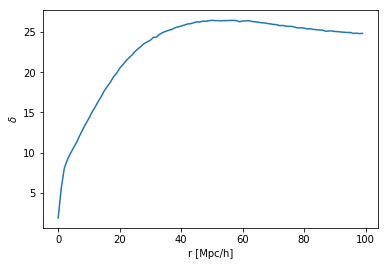

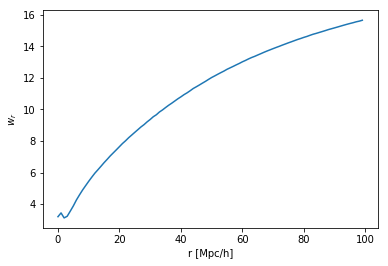

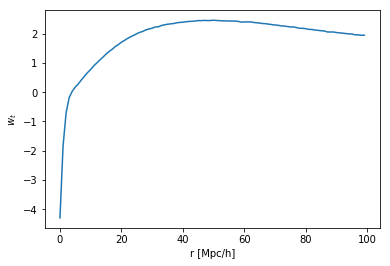

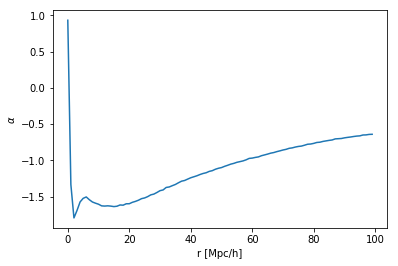

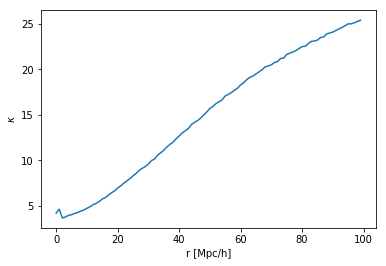

In [4]:
parameter_list = [r'$\delta$', '$w_r$', '$w_t$', r'$\alpha$', '$\kappa$']

for i, parameter in enumerate(parameter_list):
    plt.plot(popt[:,i])
    plt.xlabel('r [Mpc/h]')
    plt.ylabel(parameter_list[i])
    plt.show()

In [5]:
measured = VD(box, boxsize, snapshot)
measured_los = VD_los(box, boxsize, snapshot)

In [6]:
v_r = measured.v.r
v_t = measured.v.t

r = np.arange(0.5, 100, 1.)

v = np.array(np.meshgrid(v_r, v_t)).T.reshape(-1,2)

skewt = []
for rbin in range(len(r)):
    skewt.append(st.skewt(v, *popt[rbin]).reshape(v_t.shape[0], v_r.shape[0]))

skewt = np.asarray(skewt)


/home/c-cuesta/CentralStreamingModel/utils/plot_tools.py:122: RuntimeWarning: divide by zero encountered in log10
  cont = axScatter.contour(x, y, np.log10(jointpdf),vmin=vmin, vmax=vmax, levels=levels)


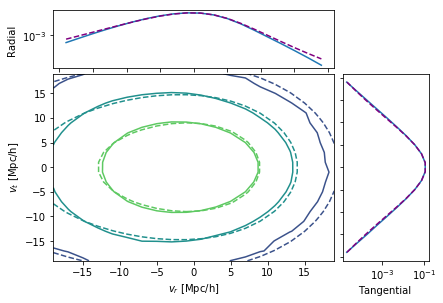

In [7]:
bestfit_jointplot(v_r, v_t, measured.jointpdf[35], skewt[35], log=True, log_marginals=True)

In [8]:
vlos= -5.5

vlos = np.linspace(-20, 20, 100)
proj = []

for v in vlos:
    proj.append(pj(measured.r, popt, 2.5, 10.5, v))

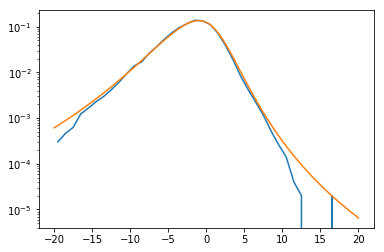

In [9]:
plt.semilogy(measured_los.v, measured_los.jointpdf[2,10])
plt.semilogy(vlos, proj, linestyle = '-')